# Hsimple
 This program creates :
   - a one dimensional histogram
   - a two dimensional histogram
   - a profile histogram
   - a memory-resident ntuple

 These objects are filled with some random numbers and saved on a file.
 If get=1 the macro returns a pointer to the TFile of "hsimple.root"
         if this file exists, otherwise it is created.
 The file "hsimple.root" is created in $ROOTSYS/tutorials if the caller has
 write access to this directory, otherwise the file is created in $PWD




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:00 AM.</small></i>

In [1]:
%%cpp -d
#include <TFile.h>
#include <TNtuple.h>
#include <TH2.h>
#include <TProfile.h>
#include <TCanvas.h>
#include <TFrame.h>
#include <TROOT.h>
#include <TSystem.h>
#include <TRandom3.h>
#include <TBenchmark.h>
#include <TInterpreter.h>

 Arguments are defined. 

In [2]:
Int_t getFile=0;

In [3]:
TString filename = "hsimple.root";
TString dir = gROOT->GetTutorialDir();
dir.ReplaceAll("/./","/");
TFile *hfile = 0;
if (getFile) {
   // if the argument getFile =1 return the file "hsimple.root"
   // if the file does not exist, it is created
   TString fullPath = dir+"hsimple.root";
   if (!gSystem->AccessPathName(fullPath,kFileExists)) {
      hfile = TFile::Open(fullPath); //in $ROOTSYS/tutorials
      if (hfile) return hfile;
   }
   //otherwise try $PWD/hsimple.root
   if (!gSystem->AccessPathName("hsimple.root",kFileExists)) {
      hfile = TFile::Open("hsimple.root"); //in current dir
      if (hfile) return hfile;
   }
}

No hsimple.root file found. must generate it !
generate hsimple.root in current directory if we have write access

In [4]:
if (gSystem->AccessPathName(".",kWritePermission)) {
   printf("you must run the script in a directory with write access\n");
   return 0;
}
hfile = (TFile*)gROOT->FindObject(filename); if (hfile) hfile->Close();
hfile = new TFile(filename,"RECREATE","Demo ROOT file with histograms");

Create some histograms, a profile histogram and an ntuple

In [5]:
TH1F *hpx = new TH1F("hpx","This is the px distribution",100,-4,4);
hpx->SetFillColor(48);
TH2F *hpxpy = new TH2F("hpxpy","py vs px",40,-4,4,40,-4,4);
TProfile *hprof = new TProfile("hprof","Profile of pz versus px",100,-4,4,0,20);
TNtuple *ntuple = new TNtuple("ntuple","Demo ntuple","px:py:pz:random:i");

gBenchmark->Start("hsimple");

Create a new canvas.

In [6]:
TCanvas *c1 = new TCanvas("c1","Dynamic Filling Example",200,10,700,500);
c1->SetFillColor(42);
c1->GetFrame()->SetFillColor(21);
c1->GetFrame()->SetBorderSize(6);
c1->GetFrame()->SetBorderMode(-1);

Fill histograms randomly

In [7]:
TRandom3 randomNum;
Float_t px, py, pz;
const Int_t kUPDATE = 1000;
for (Int_t i = 0; i < 25000; i++) {
   randomNum.Rannor(px,py);
   pz = px*px + py*py;
   Float_t rnd = randomNum.Rndm();
   hpx->Fill(px);
   hpxpy->Fill(px,py);
   hprof->Fill(px,pz);
   ntuple->Fill(px,py,pz,rnd,i);
   if (i && (i%kUPDATE) == 0) {
      if (i == kUPDATE) hpx->Draw();
      c1->Modified();
      c1->Update();
      if (gSystem->ProcessEvents())
         break;
   }
}
gBenchmark->Show("hsimple");

hsimple   : Real Time =   0.31 seconds Cpu Time =   0.15 seconds


Save all objects in this file

In [8]:
hpx->SetFillColor(0);
hfile->Write();
hpx->SetFillColor(48);
c1->Modified();
return hfile;

Note that the file is automatically close when application terminates
 or when the file destructor is called.

Draw all canvases 

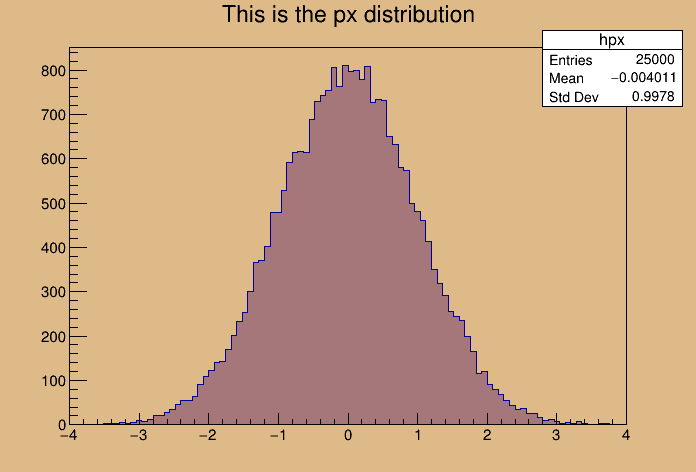

In [9]:
gROOT->GetListOfCanvases()->Draw()